In [1]:
import pandas as pd
from pandas.core.reshape.pivot import pivot_table
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('ViewingActivity.csv')
df.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alex,2023-11-29 19:03:51,01:06:03,NaN,Best. Christmas. Ever!,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:06:03,01:06:03,GB (United Kingdom)
1,Alex,2023-11-29 18:40:52,00:00:04,Autoplayed: user action: None;,Cliffhanger Clip: Best. Christmas. Ever!,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:04,00:00:04,GB (United Kingdom)
2,Alex,2023-11-29 18:40:46,00:00:04,Autoplayed: user action: None;,Cliffhanger Clip: Best. Christmas. Ever!,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:04,Not latest view,GB (United Kingdom)
3,Alex,2023-11-29 16:35:12,00:00:04,NaN,The Crown: Season 5: Decommissioned (Episode 10),NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:31:14,00:31:14,GB (United Kingdom)
4,Alex,2023-11-29 16:35:00,00:00:06,Autoplayed: user action: None;,Season 6 Part 1 Inciting Incident Clip: The Crown,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:06,00:00:06,GB (United Kingdom)
5,Alex,2023-11-03 02:24:00,00:19:45,Autoplayed: user action: None;,Friends: Season 6: The One After Vegas (Episod...,NaN,Safari MAC (Cadmium),00:19:46,00:19:46,LU (Luxembourg)
6,Alex,2023-11-03 02:03:19,00:20:40,NaN,Friends: Season 5: The One in Vegas: Part 2 (E...,NaN,Safari MAC (Cadmium),00:21:37,00:21:37,LU (Luxembourg)
7,Alex,2023-11-03 01:41:11,00:22:06,NaN,Friends: Season 5: The One in Vegas: Part 1 (E...,NaN,Safari MAC (Cadmium),00:22:07,00:22:07,LU (Luxembourg)
8,Alex,2023-11-03 01:19:06,00:22:03,NaN,Friends: Season 5: The One with Joey's Big Bre...,NaN,Safari MAC (Cadmium),00:22:03,00:22:03,LU (Luxembourg)
9,Alex,2023-11-03 01:02:58,00:16:05,NaN,Friends: Season 5: The One with the Ball (Epis...,NaN,Safari MAC (Cadmium),00:22:06,00:22:06,LU (Luxembourg)


In [3]:
# Data Exploration

In [4]:
df.shape

(24996, 10)

In [5]:
df.sample(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
4170,Alex,2018-03-12 23:46:50,00:00:05,NaN,Queer Eye: Season 1: The Renaissance of Reming...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:27:13,Not latest view,LU (Luxembourg)
1151,Alex,2020-07-19 23:56:57,00:32:01,NaN,Indian Matchmaking: Season 1: Just Find Me Som...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:32:01,00:32:01,GB (United Kingdom)
24866,Ποπη,2019-09-26 13:30:55,00:24:30,NaN,Μαγική Άβυσσος: Σεζόν 1: Επεισόδιο 2 (Επεισόδι...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:42:17,Not latest view,GR (Greece)
15626,Savvas,2017-05-23 19:48:32,00:19:01,NaN,The Big Bang Theory: Season 2: The Dead Hooker...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:19:10,Not latest view,FR (France)
9138,Savvas,2022-12-03 01:56:14,00:00:54,NaN,The Office (U.S.): Season 5: Michael Scott Pap...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:12:15,Not latest view,LU (Luxembourg)
22515,Ποπη,2021-07-28 11:45:36,00:14:55,NaN,Ματωμένος Ουρανός,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:53:51,01:53:51,GR (Greece)
4504,Alex,2018-01-16 01:01:32,00:22:07,Autoplayed: user action: None;,Friends: Season 5: The One with All the Thanks...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:22:08,Not latest view,LU (Luxembourg)
24795,Ποπη,2019-11-02 13:09:07,00:41:29,NaN,Ρίβερντεϊλ: Σεζόν 3: Κεφάλαιο τριάντα επτά: Υπ...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:42:08,00:42:08,GR (Greece)
4509,Alex,2018-01-16 00:38:09,00:00:16,NaN,Friends: Season 6: The One with the Ring (Epis...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:00:16,Not latest view,LU (Luxembourg)
10201,Savvas,2022-01-30 01:16:33,00:04:18,NaN,The Office (U.S.): Season 9: Suit Warehouse (E...,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:21:38,Not latest view,FR (France)


In [6]:
df["Profile Name"].unique()

array(['Alex', 'Kids', 'Savvas', 'mutter', 'Ποπη'], dtype=object)

In [7]:
df["Device Type"].unique()

array(['Netflix Chrome MAC (Cadmium) HTML 5', 'Safari MAC (Cadmium)',
       'Apple iPhone XR',
       'Android DefaultWidevineL3Tablet Android Tablet',
       'Samsung CE 2020 Nike-M UHD TV Smart TV', 'Chrome PC (Cadmium)',
       'Edge OSS - Windows (Cadmium)',
       'Samsung CE 2021 Kant-S2e UHD TV  Smart TV',
       'Google Chromecast V3 Streaming Stick',
       'Netflix Oculus VR Android Phone', 'Sony PS4', 'Apple iPhone 6',
       'Apple iPad 6th Gen 9.7 (Wi-Fi) iPad', 'Apple iPhone 13',
       'LG 2019 RTK K5Lp Standard UHD TV Smart TV',
       'Netflix Windows App - Cadmium Windows Mobile',
       'Samsung 2013 MStar X12 Smart TV', 'Apple iPhone 6s',
       'iPad Mini 2 WiFi', 'iPhone 5C Global',
       'Apple iPad 10.2 inch 8th Gen Wi-Fi iPad',
       'Samsung CE 2019 Muse-L HotelTV Smart TV', 'Apple iPad mini',
       'Samsung CE 2022 Kant-SU2e \n Smart TV',
       'Amazon Fire TV Stick 2020 + Streaming Stick', 'Mobile'],
      dtype=object)

In [8]:
df.columns.tolist()

['Profile Name',
 'Start Time',
 'Duration',
 'Attributes',
 'Title',
 'Supplemental Video Type',
 'Device Type',
 'Bookmark',
 'Latest Bookmark',
 'Country']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             24996 non-null  object
 1   Start Time               24996 non-null  object
 2   Duration                 24996 non-null  object
 3   Attributes               7165 non-null   object
 4   Title                    24996 non-null  object
 5   Supplemental Video Type  1534 non-null   object
 6   Device Type              24996 non-null  object
 7   Bookmark                 24996 non-null  object
 8   Latest Bookmark          24996 non-null  object
 9   Country                  24996 non-null  object
dtypes: object(10)
memory usage: 1.9+ MB


In [10]:
# Date Conversions

In [11]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [12]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [13]:
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [410]:
df['Profile Name'].value_counts()

Profile Name
Savvas    11443
Alex       7581
Ποπη       3837
mutter     2122
Kids         13
Name: count, dtype: int64

In [411]:
df['Device Type'].value_counts()

Device Type
Netflix Chrome MAC (Cadmium) HTML 5               12986
Android DefaultWidevineL3Tablet Android Tablet     3687
Chrome PC (Cadmium)                                2935
Sony PS4                                           1715
Samsung CE 2020 Nike-M UHD TV Smart TV             1424
Safari MAC (Cadmium)                                835
iPad Mini 2 WiFi                                    340
Apple iPad 6th Gen 9.7 (Wi-Fi) iPad                 283
LG 2019 RTK K5Lp Standard UHD TV Smart TV           203
Apple iPad 10.2 inch 8th Gen Wi-Fi iPad              99
Apple iPhone XR                                      96
Apple iPhone 6                                       83
Mobile                                               78
Samsung CE 2022 Kant-SU2e \n Smart TV                70
Apple iPhone 6s                                      40
Edge OSS - Windows (Cadmium)                         35
Samsung CE 2021 Kant-S2e UHD TV  Smart TV            30
Samsung CE 2019 Muse-L HotelTV Smart

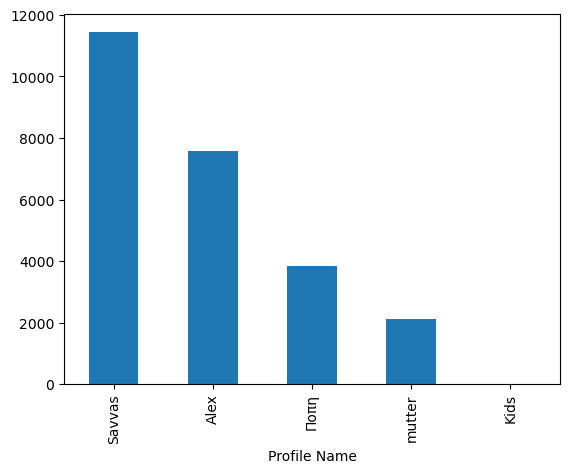

In [412]:
df['Profile Name'].value_counts().plot(kind='bar')
plt.show()

In [413]:
df['Duration'].sum()

Timedelta('281 days 07:34:16')

In [414]:
df.sort_values('Start Time')

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
19036,Savvas,2015-02-15 22:48:52+00:00,0 days 00:18:35,NaN,Jersey Girl,NaN,Safari MAC (Cadmium),00:18:35,00:18:35,LU (Luxembourg)
19035,Savvas,2015-02-17 18:31:02+00:00,0 days 00:01:20,NaN,Submarine,NaN,Sony PS4,00:01:17,00:01:17,FR (France)
19034,Savvas,2015-02-18 12:36:09+00:00,0 days 00:00:04,NaN,Arrested Development: Season 2: The One Where ...,NaN,Sony PS4,00:00:06,Not latest view,FR (France)
19033,Savvas,2015-02-18 12:36:23+00:00,0 days 00:31:25,NaN,Arrested Development: Season 4: Flight of the ...,NaN,Sony PS4,00:31:28,00:31:28,FR (France)
19032,Savvas,2015-02-18 19:39:19+00:00,0 days 00:18:06,NaN,Arrested Development: Season 4: Borderline Per...,NaN,Sony PS4,00:15:13,Not latest view,FR (France)
...,...,...,...,...,...,...,...,...,...,...
19041,mutter,2023-12-01 20:32:12+00:00,0 days 00:00:42,Autoplayed: user action: None;,Season 1 Cliffhanger Clip: Tapie,HOOK,Samsung CE 2020 Nike-M UHD TV Smart TV,00:00:42,00:00:42,LU (Luxembourg)
19040,mutter,2023-12-01 20:33:10+00:00,0 days 00:00:07,Autoplayed: user action: None;,Main Character Clip: The Killer,HOOK,Samsung CE 2020 Nike-M UHD TV Smart TV,00:00:07,00:00:07,LU (Luxembourg)
19039,mutter,2023-12-01 20:33:25+00:00,0 days 00:00:07,Autoplayed: user action: None;,Trailer: The Noel Diary,TRAILER,Samsung CE 2020 Nike-M UHD TV Smart TV,00:00:07,00:00:07,LU (Luxembourg)
19038,mutter,2023-12-01 20:33:49+00:00,0 days 00:00:04,Autoplayed: user action: None;,Limited Series Genre Specific Moment Clip: War...,HOOK,Samsung CE 2020 Nike-M UHD TV Smart TV,00:00:04,00:00:04,LU (Luxembourg)


In [415]:
df.loc[df['Profile Name']=='Savvas','Duration'].sum()

Timedelta('113 days 00:11:57')

In [416]:
df.loc[df['Profile Name']=='Alex','Duration'].sum()

Timedelta('93 days 18:21:32')

In [417]:
df.loc[df['Profile Name']=='mutter','Duration'].sum()

Timedelta('23 days 21:03:41')

In [418]:
df.loc[df['Profile Name']=='Ποπη','Duration'].sum()

Timedelta('50 days 14:46:33')

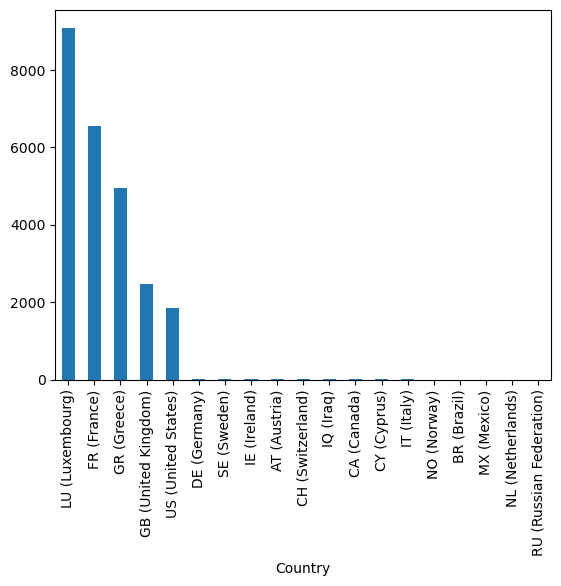

In [419]:
df['Country'].value_counts().plot(kind='bar')
plt.show()

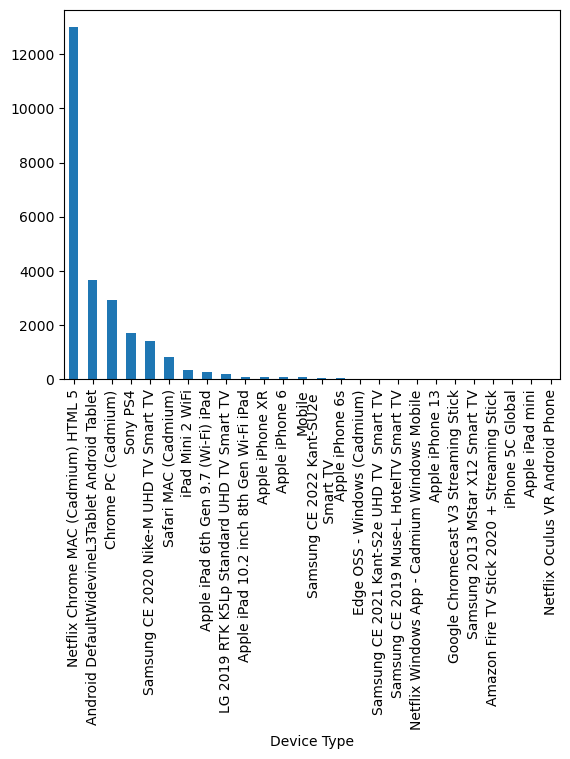

In [420]:
df['Device Type'].value_counts().plot(kind='bar')
plt.show()

In [318]:
grouped_df = df.groupby(['Profile Name', 'Country']).size().unstack()

In [319]:
country_totals = df.groupby('Country').size()
country_totals

Country
AT (Austria)                  9
BR (Brazil)                   1
CA (Canada)                   3
CH (Switzerland)              8
CY (Cyprus)                   3
DE (Germany)                 18
FR (France)                6551
GB (United Kingdom)        2467
GR (Greece)                4956
IE (Ireland)                 10
IQ (Iraq)                     4
IT (Italy)                    3
LU (Luxembourg)            9097
MX (Mexico)                   1
NL (Netherlands)              1
NO (Norway)                   2
RU (Russian Federation)       1
SE (Sweden)                  14
US (United States)         1847
dtype: int64

In [320]:
top_countries = country_totals.nlargest(5).index
top_countries

Index(['LU (Luxembourg)', 'FR (France)', 'GR (Greece)', 'GB (United Kingdom)',
       'US (United States)'],
      dtype='object', name='Country')

In [373]:
df = df[df['Country'].isin(top_countries)]

In [374]:
grouped_df = df.groupby(['Profile Name', 'Country']).size().unstack()

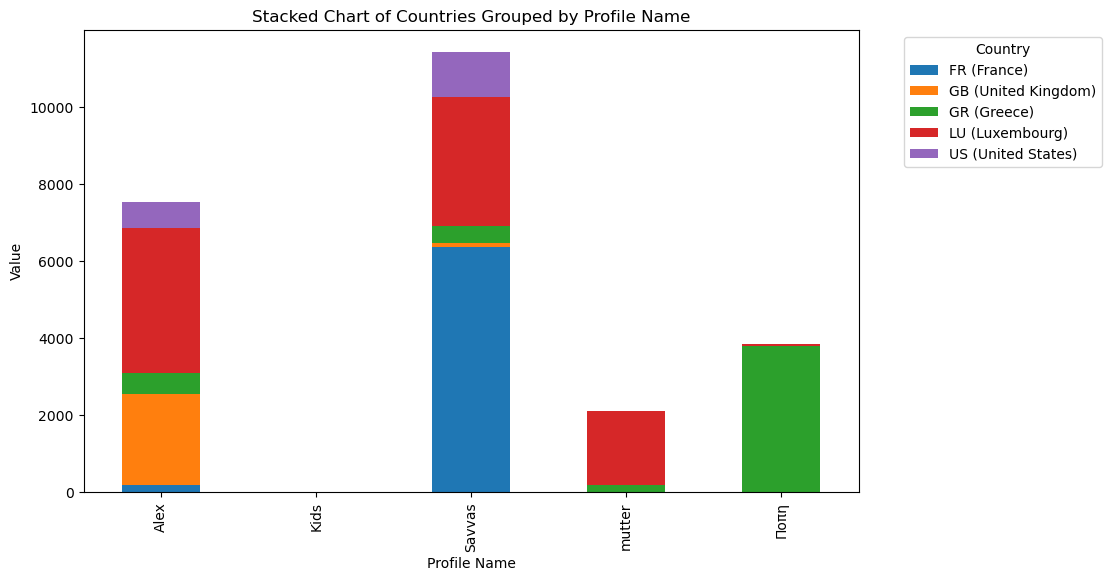

In [375]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Chart of Countries Grouped by Profile Name')
plt.xlabel('Profile Name')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

In [376]:
grouped_df2 = df.groupby(['Country', 'Profile Name']).size().unstack()

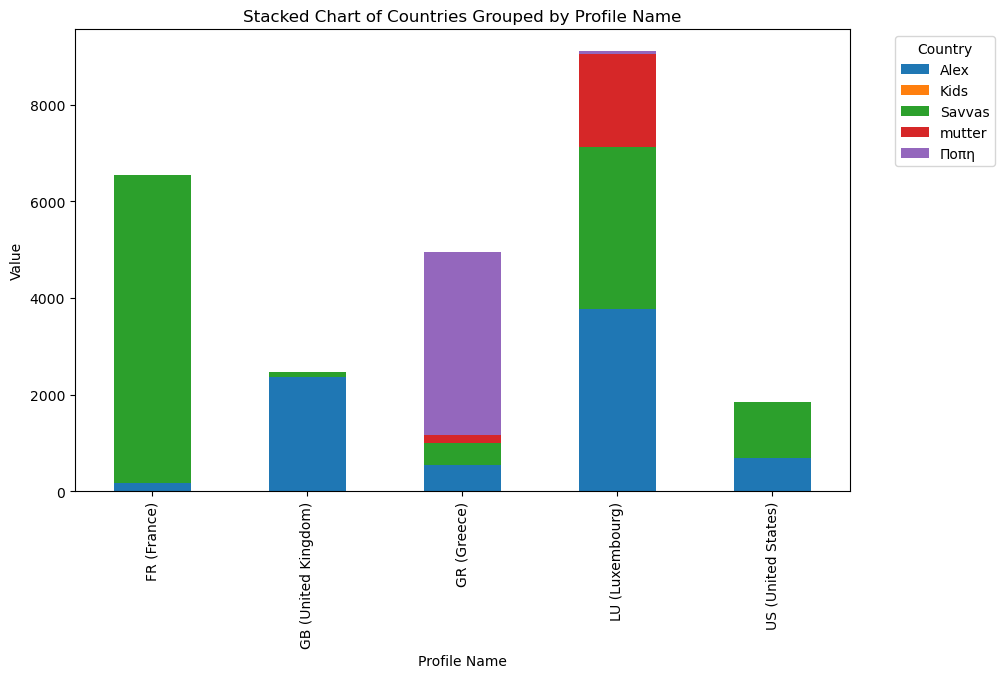

In [377]:
ax = grouped_df2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Chart of Countries Grouped by Profile Name')
plt.xlabel('Profile Name')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

In [378]:
df['Supplemental Video Type'].value_counts(dropna=False)

Supplemental Video Type
NaN               23389
HOOK               1099
TRAILER             347
TEASER_TRAILER       70
RECAP                 5
PROMOTIONAL           5
PREVIEW               2
CINEMAGRAPH           1
Name: count, dtype: int64

In [379]:
df_filtered = df[df['Supplemental Video Type'].isna()]
df_filtered

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alex,2023-11-29 19:03:51+00:00,0 days 01:06:03,NaN,Best. Christmas. Ever!,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:06:03,01:06:03,GB (United Kingdom)
3,Alex,2023-11-29 16:35:12+00:00,0 days 00:00:04,NaN,The Crown: Season 5: Decommissioned (Episode 10),NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:31:14,00:31:14,GB (United Kingdom)
5,Alex,2023-11-03 02:24:00+00:00,0 days 00:19:45,Autoplayed: user action: None;,Friends: Season 6: The One After Vegas (Episod...,NaN,Safari MAC (Cadmium),00:19:46,00:19:46,LU (Luxembourg)
6,Alex,2023-11-03 02:03:19+00:00,0 days 00:20:40,NaN,Friends: Season 5: The One in Vegas: Part 2 (E...,NaN,Safari MAC (Cadmium),00:21:37,00:21:37,LU (Luxembourg)
7,Alex,2023-11-03 01:41:11+00:00,0 days 00:22:06,NaN,Friends: Season 5: The One in Vegas: Part 1 (E...,NaN,Safari MAC (Cadmium),00:22:07,00:22:07,LU (Luxembourg)
...,...,...,...,...,...,...,...,...,...,...
24991,Ποπη,2019-04-30 19:36:56+00:00,0 days 00:06:44,NaN,Sons of Anarchy: Σεζόν 1: Κόκκαλα (Επεισόδιο 7),NaN,Mobile,00:18:07,00:18:07,GR (Greece)
24992,Ποπη,2019-04-30 19:24:29+00:00,0 days 00:11:24,NaN,Sons of Anarchy: Σεζόν 1: Κόκκαλα (Επεισόδιο 7),NaN,Mobile,00:11:24,Not latest view,GR (Greece)
24993,Ποπη,2019-04-30 19:21:47+00:00,0 days 00:01:58,NaN,Sons of Anarchy: Σεζόν 1: Αποκάλυψη (Επεισόδιο...,NaN,Mobile,00:01:58,00:01:58,GR (Greece)
24994,Ποπη,2019-02-23 09:25:56+00:00,0 days 00:00:30,NaN,Αμάρτημα: Σεζόν 1: Κόρα: Μέρος I (Επεισόδιο 1),NaN,Mobile,00:00:30,Not latest view,GR (Greece)


In [380]:
def determine_type(Title):
    if 'Season' in Title or 'Σεζόν' in Title:
        return 'Show'
    else:
        return 'Movie'

In [381]:
df_filtered['Type'] = df_filtered['Title'].apply(determine_type)

/tmp/ipykernel_10263/410938854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Type'] = df_filtered['Title'].apply(determine_type)


In [382]:
df_filtered

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
0,Alex,2023-11-29 19:03:51+00:00,0 days 01:06:03,NaN,Best. Christmas. Ever!,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:06:03,01:06:03,GB (United Kingdom),Movie
3,Alex,2023-11-29 16:35:12+00:00,0 days 00:00:04,NaN,The Crown: Season 5: Decommissioned (Episode 10),NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:31:14,00:31:14,GB (United Kingdom),Show
5,Alex,2023-11-03 02:24:00+00:00,0 days 00:19:45,Autoplayed: user action: None;,Friends: Season 6: The One After Vegas (Episod...,NaN,Safari MAC (Cadmium),00:19:46,00:19:46,LU (Luxembourg),Show
6,Alex,2023-11-03 02:03:19+00:00,0 days 00:20:40,NaN,Friends: Season 5: The One in Vegas: Part 2 (E...,NaN,Safari MAC (Cadmium),00:21:37,00:21:37,LU (Luxembourg),Show
7,Alex,2023-11-03 01:41:11+00:00,0 days 00:22:06,NaN,Friends: Season 5: The One in Vegas: Part 1 (E...,NaN,Safari MAC (Cadmium),00:22:07,00:22:07,LU (Luxembourg),Show
...,...,...,...,...,...,...,...,...,...,...,...
24991,Ποπη,2019-04-30 19:36:56+00:00,0 days 00:06:44,NaN,Sons of Anarchy: Σεζόν 1: Κόκκαλα (Επεισόδιο 7),NaN,Mobile,00:18:07,00:18:07,GR (Greece),Show
24992,Ποπη,2019-04-30 19:24:29+00:00,0 days 00:11:24,NaN,Sons of Anarchy: Σεζόν 1: Κόκκαλα (Επεισόδιο 7),NaN,Mobile,00:11:24,Not latest view,GR (Greece),Show
24993,Ποπη,2019-04-30 19:21:47+00:00,0 days 00:01:58,NaN,Sons of Anarchy: Σεζόν 1: Αποκάλυψη (Επεισόδιο...,NaN,Mobile,00:01:58,00:01:58,GR (Greece),Show
24994,Ποπη,2019-02-23 09:25:56+00:00,0 days 00:00:30,NaN,Αμάρτημα: Σεζόν 1: Κόρα: Μέρος I (Επεισόδιο 1),NaN,Mobile,00:00:30,Not latest view,GR (Greece),Show


In [383]:
type_totals = df_filtered.groupby('Type').size()
type_totals

Type
Movie     3326
Show     20063
dtype: int64

In [384]:
def edit_title(row):
    if row['Type'] == 'Show':
        return row['Title'].split('Season')[0].strip()
    else:
        return row['Title']

In [385]:
df_filtered['Title'] = df_filtered.apply(edit_title, axis=1)

/tmp/ipykernel_10263/3176200990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Title'] = df_filtered.apply(edit_title, axis=1)


In [386]:
def edit_title(row):
    if row['Type'] == 'Show':
        return row['Title'].split('Σεζόν')[0].strip()
    else:
        return row['Title']

In [387]:
df_filtered['Title'] = df_filtered.apply(edit_title, axis=1)

/tmp/ipykernel_10263/3176200990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Title'] = df_filtered.apply(edit_title, axis=1)


In [388]:
df_filtered

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
0,Alex,2023-11-29 19:03:51+00:00,0 days 01:06:03,NaN,Best. Christmas. Ever!,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:06:03,01:06:03,GB (United Kingdom),Movie
3,Alex,2023-11-29 16:35:12+00:00,0 days 00:00:04,NaN,The Crown:,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:31:14,00:31:14,GB (United Kingdom),Show
5,Alex,2023-11-03 02:24:00+00:00,0 days 00:19:45,Autoplayed: user action: None;,Friends:,NaN,Safari MAC (Cadmium),00:19:46,00:19:46,LU (Luxembourg),Show
6,Alex,2023-11-03 02:03:19+00:00,0 days 00:20:40,NaN,Friends:,NaN,Safari MAC (Cadmium),00:21:37,00:21:37,LU (Luxembourg),Show
7,Alex,2023-11-03 01:41:11+00:00,0 days 00:22:06,NaN,Friends:,NaN,Safari MAC (Cadmium),00:22:07,00:22:07,LU (Luxembourg),Show
...,...,...,...,...,...,...,...,...,...,...,...
24991,Ποπη,2019-04-30 19:36:56+00:00,0 days 00:06:44,NaN,Sons of Anarchy:,NaN,Mobile,00:18:07,00:18:07,GR (Greece),Show
24992,Ποπη,2019-04-30 19:24:29+00:00,0 days 00:11:24,NaN,Sons of Anarchy:,NaN,Mobile,00:11:24,Not latest view,GR (Greece),Show
24993,Ποπη,2019-04-30 19:21:47+00:00,0 days 00:01:58,NaN,Sons of Anarchy:,NaN,Mobile,00:01:58,00:01:58,GR (Greece),Show
24994,Ποπη,2019-02-23 09:25:56+00:00,0 days 00:00:30,NaN,Αμάρτημα:,NaN,Mobile,00:00:30,Not latest view,GR (Greece),Show


In [389]:
def edit_title(row):
    if row['Type'] == 'Show':
        return row['Title'].split(':')[0].strip()
    else:
        return row['Title']

In [390]:
df_filtered['Title'] = df_filtered.apply(edit_title, axis=1)

/tmp/ipykernel_10263/3176200990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Title'] = df_filtered.apply(edit_title, axis=1)


In [391]:
df_filtered

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
0,Alex,2023-11-29 19:03:51+00:00,0 days 01:06:03,NaN,Best. Christmas. Ever!,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:06:03,01:06:03,GB (United Kingdom),Movie
3,Alex,2023-11-29 16:35:12+00:00,0 days 00:00:04,NaN,The Crown,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:31:14,00:31:14,GB (United Kingdom),Show
5,Alex,2023-11-03 02:24:00+00:00,0 days 00:19:45,Autoplayed: user action: None;,Friends,NaN,Safari MAC (Cadmium),00:19:46,00:19:46,LU (Luxembourg),Show
6,Alex,2023-11-03 02:03:19+00:00,0 days 00:20:40,NaN,Friends,NaN,Safari MAC (Cadmium),00:21:37,00:21:37,LU (Luxembourg),Show
7,Alex,2023-11-03 01:41:11+00:00,0 days 00:22:06,NaN,Friends,NaN,Safari MAC (Cadmium),00:22:07,00:22:07,LU (Luxembourg),Show
...,...,...,...,...,...,...,...,...,...,...,...
24991,Ποπη,2019-04-30 19:36:56+00:00,0 days 00:06:44,NaN,Sons of Anarchy,NaN,Mobile,00:18:07,00:18:07,GR (Greece),Show
24992,Ποπη,2019-04-30 19:24:29+00:00,0 days 00:11:24,NaN,Sons of Anarchy,NaN,Mobile,00:11:24,Not latest view,GR (Greece),Show
24993,Ποπη,2019-04-30 19:21:47+00:00,0 days 00:01:58,NaN,Sons of Anarchy,NaN,Mobile,00:01:58,00:01:58,GR (Greece),Show
24994,Ποπη,2019-02-23 09:25:56+00:00,0 days 00:00:30,NaN,Αμάρτημα,NaN,Mobile,00:00:30,Not latest view,GR (Greece),Show


In [392]:
df_show_only = df_filtered[df_filtered['Type'] == 'Show']

In [393]:
df_movie_only = df_filtered[df_filtered['Type'] == 'Movie']

In [394]:
fav_movies = df_movie_only.groupby('Title').size()
fav_movies

Title
13 Going on 30             4
1899: Στα Παρασκήνια       2
1922                       2
2 States                   1
22 Ιουλίου                 1
                          ..
Χριστούγεννα εξ Ουρανού    1
Χωρίς Ίχνη                 1
Χόρεψε Μαζί του            5
Ψίθυροι στη Νύχτα          6
Ψύχωση                     2
Length: 1216, dtype: int64

In [395]:
df_movie_only['Title'].value_counts()

Title
Ricky Gervais: Humanity             36
Sex and the City 2                  32
Louis C.K. 2017                     27
Sex and the City: The Movie         24
Nate Bargatze: The Tennessee Kid    21
                                    ..
Mr. Harrigan's Phone                 1
Yara                                 1
The Wonder                           1
The Judge                            1
The Open House                       1
Name: count, Length: 1216, dtype: int64

In [396]:
top_10_movies = df_movie_only.sort_values(by='Title', ascending=False).head(10)
top_10_movies

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
22797,Ποπη,2021-05-17 14:06:08+00:00,0 days 00:12:23,NaN,Ψύχωση,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:12:20,Not latest view,GR (Greece),Movie
22796,Ποπη,2021-05-18 12:53:40+00:00,0 days 01:32:46,NaN,Ψύχωση,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:44:59,01:44:59,GR (Greece),Movie
22086,Ποπη,2022-01-21 13:31:14+00:00,0 days 00:05:06,NaN,Ψίθυροι στη Νύχτα,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:15:14,Not latest view,GR (Greece),Movie
22087,Ποπη,2022-01-20 21:18:52+00:00,0 days 01:10:11,NaN,Ψίθυροι στη Νύχτα,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:10:11,Not latest view,GR (Greece),Movie
22070,Ποπη,2022-01-29 13:51:06+00:00,0 days 00:06:30,NaN,Ψίθυροι στη Νύχτα,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:30:25,01:30:25,GR (Greece),Movie
22071,Ποπη,2022-01-28 22:21:11+00:00,0 days 00:43:31,NaN,Ψίθυροι στη Νύχτα,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:23:50,Not latest view,GR (Greece),Movie
22072,Ποπη,2022-01-28 21:25:54+00:00,0 days 00:03:29,NaN,Ψίθυροι στη Νύχτα,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:20:37,Not latest view,GR (Greece),Movie
22085,Ποπη,2022-01-21 20:57:00+00:00,0 days 00:15:13,NaN,Ψίθυροι στη Νύχτα,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:30:24,Not latest view,GR (Greece),Movie
22488,Ποπη,2021-08-10 16:36:28+00:00,0 days 00:08:39,NaN,Χόρεψε Μαζί του,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:52:24,Not latest view,GR (Greece),Movie
22489,Ποπη,2021-08-10 14:57:54+00:00,0 days 00:07:35,NaN,Χόρεψε Μαζί του,NaN,Android DefaultWidevineL3Tablet Android Tablet,01:43:51,Not latest view,GR (Greece),Movie


In [397]:
df_alex = df_filtered[df_filtered['Profile Name']== 'Alex']
df_alex

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Type
0,Alex,2023-11-29 19:03:51+00:00,0 days 01:06:03,NaN,Best. Christmas. Ever!,NaN,Netflix Chrome MAC (Cadmium) HTML 5,01:06:03,01:06:03,GB (United Kingdom),Movie
3,Alex,2023-11-29 16:35:12+00:00,0 days 00:00:04,NaN,The Crown,NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:31:14,00:31:14,GB (United Kingdom),Show
5,Alex,2023-11-03 02:24:00+00:00,0 days 00:19:45,Autoplayed: user action: None;,Friends,NaN,Safari MAC (Cadmium),00:19:46,00:19:46,LU (Luxembourg),Show
6,Alex,2023-11-03 02:03:19+00:00,0 days 00:20:40,NaN,Friends,NaN,Safari MAC (Cadmium),00:21:37,00:21:37,LU (Luxembourg),Show
7,Alex,2023-11-03 01:41:11+00:00,0 days 00:22:06,NaN,Friends,NaN,Safari MAC (Cadmium),00:22:07,00:22:07,LU (Luxembourg),Show
...,...,...,...,...,...,...,...,...,...,...,...
7576,Alex,2015-09-30 21:30:47+00:00,0 days 00:01:17,NaN,"House, M.D.",NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:01:17,Not latest view,FR (France),Show
7577,Alex,2015-09-30 20:17:33+00:00,0 days 00:21:36,NaN,"House, M.D.",NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:21:36,00:21:36,FR (France),Show
7578,Alex,2015-09-30 19:34:21+00:00,0 days 00:43:05,NaN,"House, M.D.",NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:43:05,00:43:05,FR (France),Show
7579,Alex,2015-09-30 18:43:13+00:00,0 days 00:43:35,NaN,"House, M.D.",NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:43:35,00:43:35,FR (France),Show


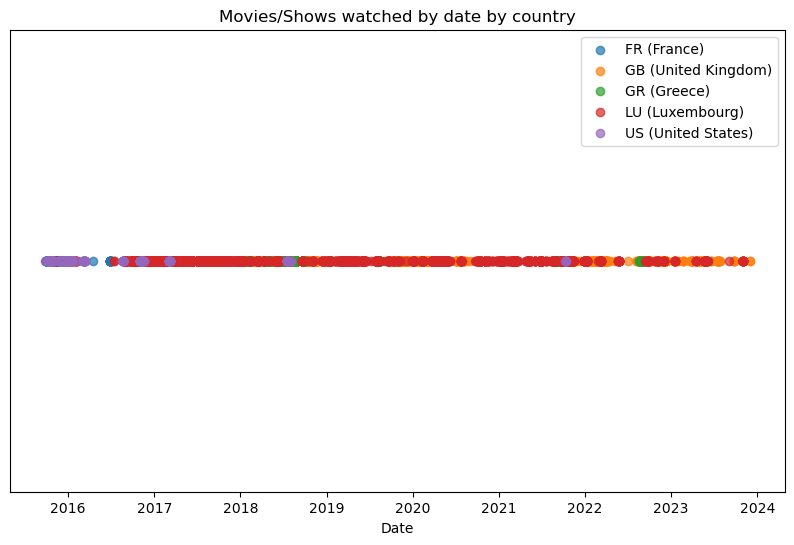

In [372]:
plt.figure(figsize=(10, 6))
for Country, group in df_alex.groupby('Country'):
    plt.scatter(group['Start Time'], [1] * len(group), label=Country, alpha=0.7)
    plt.legend()
    plt.title('Movies/Shows watched by date by country')
    plt.xlabel('Date')
    plt.yticks([])  # Hide y-axis ticks